# Задача: Анализ текста о науке о данных

> *В этом блокноте мы экспериментируем с использованием разных URL - статьи из Википедии о машинном обучении. Вы можете заметить, что, в отличие от науки о данных, эта статья содержит множество терминов, что делает анализ более сложным. Нам нужно придумать другой способ очистки данных после извлечения ключевых слов, чтобы избавиться от некоторых частых, но незначимых словосочетаний.*

В этом примере давайте проведем простое упражнение, охватывающее все этапы традиционного процесса науки о данных. Вам не нужно писать код, вы можете просто нажимать на ячейки ниже, чтобы выполнить их и наблюдать за результатом. В качестве задания вам предлагается попробовать этот код с другими данными.

## Цель

На этом уроке мы обсуждали различные концепции, связанные с наукой о данных. Давайте попробуем обнаружить больше связанных концепций, выполняя **текстовый анализ**. Мы начнем с текста о науке о данных, извлечем из него ключевые слова, а затем попробуем визуализировать результат.

В качестве текста я буду использовать страницу о науке о данных из Википедии:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Шаг 1: Получение данных

Первый шаг в любом процессе работы с данными — это получение данных. Для этого мы будем использовать библиотеку `requests`:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Шаг 2: Преобразование данных

Следующий шаг — преобразовать данные в форму, подходящую для обработки. В нашем случае мы скачали исходный HTML-код страницы, и нам нужно преобразовать его в обычный текст.

Существует множество способов сделать это. Мы будем использовать самый простой встроенный объект [HTMLParser](https://docs.python.org/3/library/html.parser.html) из Python. Нам нужно создать подкласс класса `HTMLParser` и определить код, который будет собирать весь текст внутри HTML-тегов, за исключением тегов `<script>` и `<style>`.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Шаг 3: Получение инсайтов

Самый важный шаг — преобразовать наши данные в форму, из которой можно извлечь полезные инсайты. В нашем случае мы хотим выделить ключевые слова из текста и определить, какие из них наиболее значимы.

Мы будем использовать библиотеку Python под названием [RAKE](https://github.com/aneesha/RAKE) для извлечения ключевых слов. Сначала установим эту библиотеку, если она еще не установлена:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Основная функциональность доступна через объект `Rake`, который мы можем настроить с помощью некоторых параметров. В нашем случае мы установим минимальную длину ключевого слова в 5 символов, минимальную частоту ключевого слова в документе - 3, а максимальное количество слов в ключевом слове - 2. Не стесняйтесь экспериментировать с другими значениями и наблюдать за результатом.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Мы получили список терминов вместе с их степенью важности. Как видно, наиболее значимые дисциплины, такие как машинное обучение и большие данные, находятся на верхних позициях списка.

## Шаг 4: Визуализация результата

Люди лучше всего воспринимают данные в визуальной форме. Поэтому часто имеет смысл визуализировать данные, чтобы извлечь некоторые инсайты. Мы можем использовать библиотеку `matplotlib` в Python, чтобы построить простое распределение ключевых слов с их значимостью:


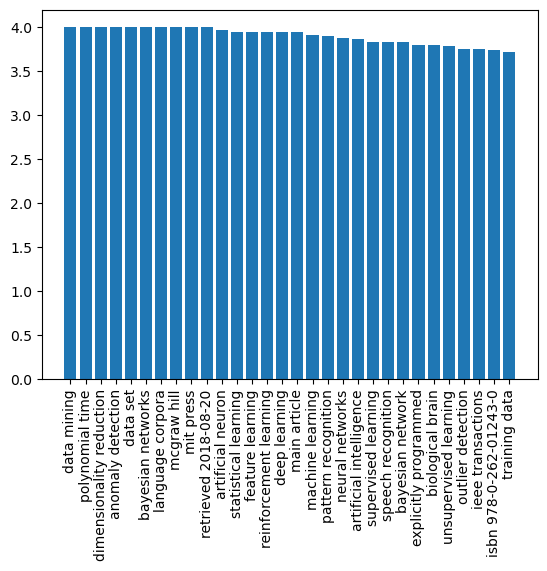

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Однако существует еще более лучший способ визуализировать частоту слов - использовать **Облако слов**. Нам потребуется установить еще одну библиотеку, чтобы построить облако слов из нашего списка ключевых слов.


In [71]:
!{sys.executable} -m pip install wordcloud

`Объект WordCloud отвечает за прием либо исходного текста, либо заранее вычисленного списка слов с их частотами, и возвращает изображение, которое затем можно отобразить с помощью matplotlib:`


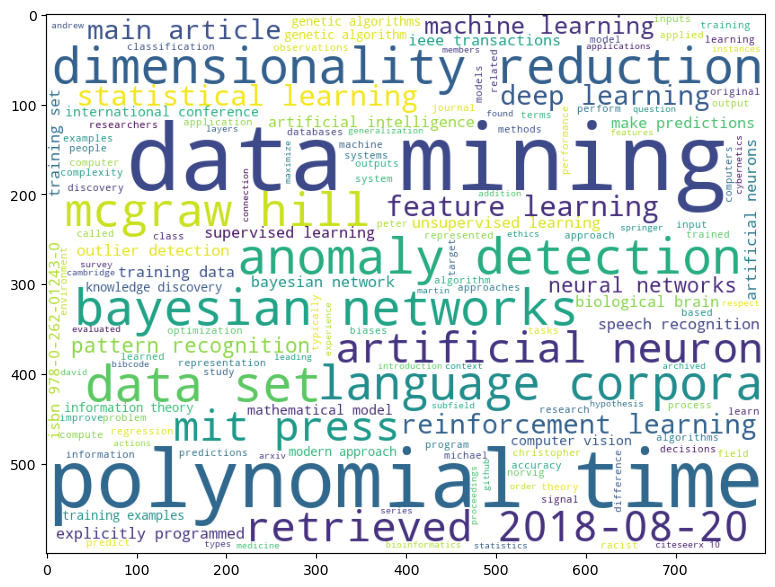

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Мы также можем передать исходный текст в `WordCloud` - давайте посмотрим, сможем ли мы получить похожий результат:


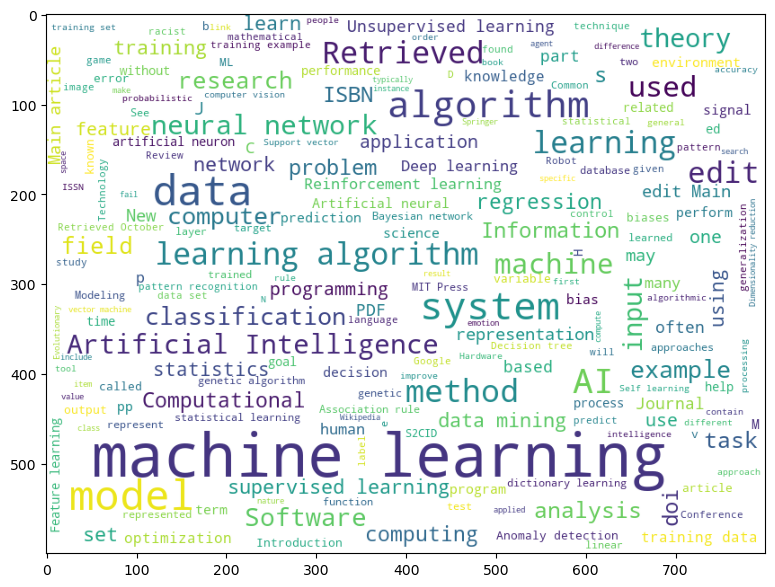

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Вы можете заметить, что облако слов теперь выглядит более впечатляющим, но оно также содержит много шума (например, несвязанные слова, такие как `Retrieved on`). Кроме того, мы получаем меньше ключевых слов, состоящих из двух слов, таких как *data scientist* или *computer science*. Это связано с тем, что алгоритм RAKE гораздо лучше справляется с выбором подходящих ключевых слов из текста. Этот пример подчеркивает важность предварительной обработки и очистки данных, так как четкая картина в итоге позволит нам принимать более обоснованные решения.

В этом упражнении мы прошли простой процесс извлечения смысла из текста Википедии в виде ключевых слов и облака слов. Этот пример довольно прост, но он хорошо демонстрирует все типичные шаги, которые выполняет специалист по данным при работе с данными, начиная с их получения и заканчивая визуализацией.

В нашем курсе мы подробно обсудим все эти шаги.



---

**Отказ от ответственности**:  
Этот документ был переведен с использованием сервиса автоматического перевода [Co-op Translator](https://github.com/Azure/co-op-translator). Несмотря на наши усилия обеспечить точность, имейте в виду, что автоматические переводы могут содержать ошибки или неточности. Оригинальный документ на его исходном языке следует считать авторитетным источником. Для получения критически важной информации рекомендуется профессиональный перевод человеком. Мы не несем ответственности за любые недоразумения или неправильные интерпретации, возникшие в результате использования данного перевода.
